# This example read a techsas file with the basic netcdf4 API
This example has no dependencies with the pyTechsas library

**import netcdf4 libraries and matplotlib**


In [1]:
import warnings
warnings.filterwarnings('ignore') #ignore all warning (especially numpy)
import netCDF4 as nc
import matplotlib.pyplot as plt
import os


**open and read netcdf file**

In [2]:
my_netcdf_file = r"..\data\peacetime\THS\20170610-112000-hydrology-PP_SBE21.ths.nc"
if not os.path.exists(my_netcdf_file):
    file_path =os.path.join(os.getcwd(),my_netcdf_file)
    raise FileNotFoundError(f"input file not found, check path or download example from seanoe: {file_path}")

netcdf_dataset = nc.Dataset(my_netcdf_file, mode='r')


**Print dataset variables list**

In [3]:
print(netcdf_dataset.variables.keys())

dict_keys(['rawdata', 'salinity', 'temp', 'conduct', 'intaketemp', 'sndspeed', 'densityanomaly', 'time'])


**retrieve data of one variable as a numpy array**

In [4]:
sndspeed = netcdf_dataset.variables['sndspeed'][:] #retrieve values as numpy array

print(sndspeed[1:4]) #print first data

[1522.1 1522.1 1522.1]


**plot this variable in matplolib and show it**

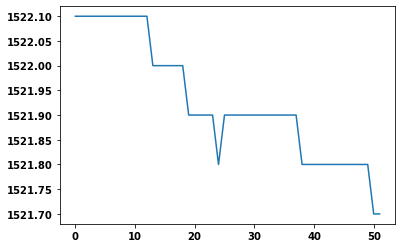

In [5]:
plt.plot(sndspeed)

**retrieve data of time variable and convert them to python datetime objects**

In [7]:
time_values = netcdf_dataset.variables['time'][:] #retrieve net
time_variable =  netcdf_dataset.variables['time'] #retrieve netcdf variable object
time_values = time_variable[:] #values as numpy array, values are in days since 1900
date_time_values=nc.num2date(time_values, calendar=time_variable.calendar, units=time_variable.units,only_use_cftime_datetimes=False) #convert to datetime objects
print(f"{date_time_values[0]}...{date_time_values[-1]}") #print first and last values

2017-06-10 11:19:55.363584...2017-06-10 11:25:01.363008


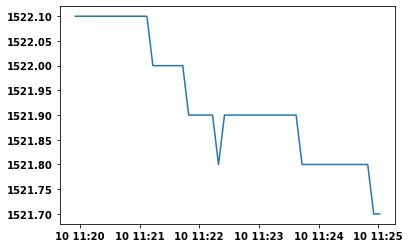

In [8]:
plt.plot(date_time_values,sndspeed)  #plot sndspeed variable and date_time_values